# Анализ данных на Python

*Алла Тамбовцева*

## Практикум по парсингу HTML с `BeautifulSoup`: тэги и атрибуты

Мы уже немного познакомились со структурой html-страниц, теперь попробуем выгрузить информацию из более интересной страницы, а точнее, с сайта [nplus1.ru](https://nplus1.ru/). Наша задача – выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в файл Excel.

Для работы нам снова понадобится модуль `requests` для отправки запросов, для «подключения» к странице и получения ее содержимого в виде строки, и функция `BeautifulSoup` из библиотеки `bs4` для удобного поиска по полученной строке:

In [1]:
import requests
from bs4 import BeautifulSoup

Сохраним ссылку на главную страницу в переменную `main` и отправим запрос к ней с помощью функции `get()` из `requests`:

In [2]:
main = "https://nplus1.ru/"
page = requests.get(main)

Заберём исходный код страницы и преобразуем строку с ним в объект `BeautifulSoup`:

In [3]:
soup = BeautifulSoup(page.text)

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Найдем кусочки кода HTML, соответствующие всем ссылкам на главной странице сайта:

In [4]:
links_raw = soup.find_all("a") 
links_raw[10:20]  # несколько штук для примера

[<a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=880">Астрономия</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=768">Генетика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=890">Математика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=871">Космонавтика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=876">Археология</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=775">Нейронауки</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=767">На мышах</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=771">Звук</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search

Каждый элемент возвращаемого списка имеет тип `BeautifulSoup` и структуру, очень похожую на словарь. Например, ссылка `<a class="hover:underline transition-colors duration-75" href="/search/empty/768">Генетика</a>` изнутри выглядит как словарь следующего вида:

    {'href' : '/search/empty/768', 
     'class' : 'hover:underline transition-colors duration-75'}.
    
Как мы помним, значение по ключу из словаря можно вызвать с помощью метода `.get()`. Давайте извлечем значения по ключу `href` из каждого элемента списка `links`:

In [5]:
links = [li.get("href") for li in links_raw]
links[10:20]  # несколько штук для примера

['https://nplus1.ru/search?tags=880',
 'https://nplus1.ru/search?tags=768',
 'https://nplus1.ru/search?tags=890',
 'https://nplus1.ru/search?tags=871',
 'https://nplus1.ru/search?tags=876',
 'https://nplus1.ru/search?tags=775',
 'https://nplus1.ru/search?tags=767',
 'https://nplus1.ru/search?tags=771',
 'https://nplus1.ru/search?tags=772',
 'https://nplus1.ru/search?tags=778']

Ссылок в списке выше много. Но нам нужны только новости – ссылки, которые начинаются с `https://nplus1.ru/news`. Создадим пустой список `news` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [6]:
news = []
for li in links:
    if "https://nplus1.ru/news/" in li:
        news.append(li)

In [7]:
print(news[0:10])

['https://nplus1.ru/news/2024/05/16/sun-goes-bum-bum', 'https://nplus1.ru/news/2024/05/18/nasa-esa-exomars', 'https://nplus1.ru/news/2024/05/18/venosa-notarchirico', 'https://nplus1.ru/news/2024/05/18/proplid-large', 'https://nplus1.ru/news/2024/05/18/sea-otters-tools-teeth', 'https://nplus1.ru/news/2024/05/17/binary-smbh-far', 'https://nplus1.ru/news/2024/05/17/robot-snails-swarm', 'https://nplus1.ru/news/2024/05/17/taningia-danae', 'https://nplus1.ru/news/2024/05/17/social-media-cigarette', 'https://nplus1.ru/news/2024/05/17/hydrogel-oxidizes-ethanol']


Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `news` в цикле. Посмотрим на новость с индексом 0, у вас может быть другая, новости обновляются.

In [8]:
link0 = news[0]
print(link0)

https://nplus1.ru/news/2024/05/16/sun-goes-bum-bum


### Задача 1

Отправьте запрос к странице по ссылке `link0` с одной новостью, получите результат в виде объекта `BeautifulSoup` и сохраните его как `soup0`.

In [9]:
page0 = requests.get(link0)
soup0 = BeautifulSoup(page0.text)

### Задача 2

Найдите заголовок новости и сохраните его в переменную `title`.

In [10]:
# заменяем неразрывный пробел \xa0 на обычный
title = soup0.find("title").text.replace("\xa0", " ")
print(title)

Солнце произвело самую мощную вспышку в текущем цикле активности. Но она не приведет к новой мощной геомагнитной буре


### Задача 3

Найдите имя автора новости и дату её публикации. Сохраните их в `author` и `date` соответственно.

In [11]:
# в словаре пишем уточнение – пару атрибут-его значение
date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
author = soup0.find("meta", {"name" : "author"}).get("content")
print(date, author)

2024-05-16 Александр Войтюк


### Задача 4

Найдите сложность новости и рубрики, к которым она относится. Сохраните сложность в переменную `diffc`. Рубрики сначала можно сохранить в список, а затем его элементы объединить в одну строку `rubs`.

**Подсказка:** чтобы упростить себе жизнь, найдите сначала раздел (`div`), в котором на странице хранится дата и время публикации, сложность и рубрики, а затем выполняйте поиск в рамках этого раздела.

In [12]:
# находим раздел div с нужным классом

div = soup0.find("div", {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})

# находим все фрагменты с тэгом <span> внутри div
# spans – список объектоd типа BeautifulSoup

spans = div.find_all("span")

# в span c индексом 3 хранится сложность
# рубрик глобально может быть несколько,
# выбираем все с 4 до конца списка

diffc = spans[3].text
rubs_raw = spans[4:]

# извлекаем текст и склеиваем в одну строку
rubs = ", ".join([r.text for r in rubs_raw])

print(diffc, rubs)

3.1 Астрономия


### Задача 5

Соберите из абзацев текст новости и сохраните его в переменную `text`. Избавьтесь от постронних символов (`\xa0`, `\n`) в тексте. 

In [13]:
# ищем абзацы с текстом
# склеиваем в единую строку
# внимание на последние фразы текста

pars = soup0.find_all("p", {"class" : "mb-6"})
text = " ".join([p.text for p in pars])
text = text.replace("\xa0", " ").replace("\n", " ")
print(text)

Но она не приведет к новой мощной геомагнитной буре Космическая обсерватория SDO вечером 14 мая заметила на Солнце вспышку вспышку класса X8.7, которая стала самой мощной в текущем цикле активности. Ее породила группа пятен, ответственная также за недавнюю и самую интенсивную в 21 веке геомагнитную бурю, сообщается на сайте Центра прогноза космической погоды NOAA. В настоящее время Солнце находится на этапе нарастания активности в текущем и 25 по счету с момента начала наблюдений 11-летнем цикле активности. Это проявляется в увеличении числа солнечных пятен, а также ростом частоты и мощности вспышек и корональных выбросов массы. Максимум активности может быть достигнут в следующем году. В начале мая 2024 года на Солнце стали видны быстрорастущие группы пятен AR3663 и AR3664, первая из которых породила несколько мощных вспышек, в том числе класса X, из-за нестабильной магнитной конфигурации, что привело к кратковременному возникновению помех в коротковолновой связи и вызвало геомагнитны

Проблема: помимо текста текущей новости забирается подзаголовок новости с длинным классом `... text-main-gray mb-6`, подзаголовок следующей новости на странице с таким же длинным классом, плюс, абзацы следующей новости после него с классом `mb-6` (см. страницу новости, новости сейчас часто отображаются в таком формате). Поэтому вот более продвинутый вариант – убираем часть следующей новости универсальным образом:

In [14]:
# важно: первый элемент pars убираем, подзаголовок новости – формально не текст!
# находим индекс элемента с длинным классом ... text-main-gray mb-6,
# так в нем – подзаголовок следующей новости,
# и отбираем все элементы до него

pars = soup0.find_all("p", {"class" : "mb-6"})[1:]
classes = [p.get("class") for p in pars]
print(classes)

for c in classes:
    if "text-main-gray" in c:
        i = classes.index(c)
pars_upd = pars[:i]

[['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['text-36', 'md:text-44', 'xl:text-54', 'font-spectral', 'text-main-gray', 'mb-6'], ['mb-6']]


In [15]:
# а вот дальше по обычной схеме
# внимание на последние фразы текста

text = " ".join([p.text for p in pars_upd])
text = text.replace("\xa0", " ").replace("\n", " ")
print(text)

Космическая обсерватория SDO вечером 14 мая заметила на Солнце вспышку вспышку класса X8.7, которая стала самой мощной в текущем цикле активности. Ее породила группа пятен, ответственная также за недавнюю и самую интенсивную в 21 веке геомагнитную бурю, сообщается на сайте Центра прогноза космической погоды NOAA. В настоящее время Солнце находится на этапе нарастания активности в текущем и 25 по счету с момента начала наблюдений 11-летнем цикле активности. Это проявляется в увеличении числа солнечных пятен, а также ростом частоты и мощности вспышек и корональных выбросов массы. Максимум активности может быть достигнут в следующем году. В начале мая 2024 года на Солнце стали видны быстрорастущие группы пятен AR3663 и AR3664, первая из которых породила несколько мощных вспышек, в том числе класса X, из-за нестабильной магнитной конфигурации, что привело к кратковременному возникновению помех в коротковолновой связи и вызвало геомагнитные бури на Земле. Группа пятен AR3664 смогла за сутки

### Задача 6

Напишите функцию `get_news()`, которая принимает на вход ссылку на страницу с одной новостью, а возвращает список из следующих характеристик: имя автора, дата публикации, сложность новости, рубрики, текст новости.

In [16]:
def get_news(link0):
    """
    Parameters:
        link0 – url for one piece of news (string)
    Returns:
        list of the following features:
            * new's title (string)
            * new's date (string)
            * new's author (string)
            * new's difficulty (string)
            * new's rubrics (string)
            * new's text (string)
    """
    page0 = requests.get(link0)
    soup0 = BeautifulSoup(page0.text)
    
    title = soup0.find("title").text.replace("\xa0", " ")
    date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
    author = soup0.find("meta", {"name" : "author"}).get("content")
    div = soup0.find("div", {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})
    spans = div.find_all("span")
    diffc = spans[3].text
    rubs_raw = spans[4:]
    rubs = ", ".join([r.text for r in rubs_raw])
    
    # для текста – более универсальный вариант без лишней новости
    pars = soup0.find_all("p", {"class" : "mb-6"})
    classes = [p.get("class") for p in pars]
    for c in classes:
        if "text-main-gray" in c:
            i = classes.index(c)
    pars_upd = pars[:i]
    text = " ".join([p.text for p in pars_upd])
    text = text.replace("\xa0", " ").replace("\n", " ")
    
    return [title, author, date, diffc, rubs, text]

Отлично! Теперь осталось применить функцию ко всем ссылкам в списке `news`. Чтобы сайт не понял, что мы его автоматически грабим, будем выгружать новости постепенно – с задержкой в 1.5 секунды. Импортируем для этого функцию `sleep` :

In [17]:
from time import sleep

Теперь будем применять функцию в цикле к каждой ссылке в `news`, только с одним дополнением – добавленной конструкцией `try-except`, которая позволит продолжать исполнение цикла, если при применении функции Python столкнулся с ошибкой любого вида:

In [18]:
info = []
for n in news:
    # пробуй исполнить следующий код
    try:
        res = get_news(n)
        info.append(res)
        print(n)
    # если он вызвал ошибку любого вида, печатай сообщение и иди дальше
    except:
        print("Something went wrong")
        print(n)
    sleep(1.5)

https://nplus1.ru/news/2024/05/16/sun-goes-bum-bum
https://nplus1.ru/news/2024/05/18/nasa-esa-exomars
https://nplus1.ru/news/2024/05/18/venosa-notarchirico
https://nplus1.ru/news/2024/05/18/proplid-large
https://nplus1.ru/news/2024/05/18/sea-otters-tools-teeth
https://nplus1.ru/news/2024/05/17/binary-smbh-far
https://nplus1.ru/news/2024/05/17/robot-snails-swarm
https://nplus1.ru/news/2024/05/17/taningia-danae
https://nplus1.ru/news/2024/05/17/social-media-cigarette
https://nplus1.ru/news/2024/05/17/hydrogel-oxidizes-ethanol
https://nplus1.ru/news/2024/05/17/hvar
https://nplus1.ru/news/2024/05/17/spicy-chip-autopsy
https://nplus1.ru/news/2024/05/17/sex-differences-diabetes
https://nplus1.ru/news/2024/05/17/threshing-sledges
https://nplus1.ru/news/2024/05/17/double-quasar-new
https://nplus1.ru/news/2024/05/17/scenarios
https://nplus1.ru/news/2024/05/16/adansonia-phylogeny
https://nplus1.ru/news/2024/05/16/permafrost-carbon-budget
https://nplus1.ru/news/2024/05/16/elephants-say-hi
https:/

Посмотрим на несколько элементов `info`:

In [ ]:
#info[10:12]

Финальный штрих – импортируем `pandas` и преобразуемый полученный список кортежей в датафрейм:

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(info)
df.head()

,0,1,2,3,4,5
0,Солнце произвело самую мощную вспышку в текуще...,Александр Войтюк,2024-05-16,3.1,Астрономия,
1,NASA предоставит для европейского марсохода ра...,Александр Войтюк,2024-05-18,1.9,Космонавтика,
2,Древнейший обломок человеческой кости из Итали...,Михаил Подрезов,2024-05-18,3.3,"Антропология, Археология",
3,Астрономы отыскали самый крупный протопланетны...,Александр Войтюк,2024-05-18,4.1,Астрономия,
4,Использование орудий защитило зубы каланов от ...,Сергей Коленов,2024-05-18,4.3,Зоология,


Не везде информация сгрузилась корректно, есть проблемы унификации, можно потом поправить это, написав функцию и применив ее через `.apply()` к соответствующим столбцам.

А пока добавим содержательные названия столбцов и выгрузим датафрейм в файл:

In [23]:
df.columns = ["title", "author", "date", "diffc", "rubrics", "text"]
df.to_excel("nplus1.xlsx")

### Задача 7*

Постройте гистограмму для сложности новости.

In [24]:
# проверим типы данных – все строки (object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    52 non-null     object
 1   author   52 non-null     object
 2   date     52 non-null     object
 3   diffc    52 non-null     object
 4   rubrics  52 non-null     object
 5   text     52 non-null     object
dtypes: object(6)
memory usage: 2.6+ KB


In [25]:
# перезапишем сложность – сделаем ее типа float
df["diffc"] = df["diffc"].astype(float)

In [26]:
# простая гистограмма
df["diffc"].hist(color = "limegreen", edgecolor = "white");

Более продвинутый вариант гистограммы:

In [27]:
from matplotlib import pyplot as plt

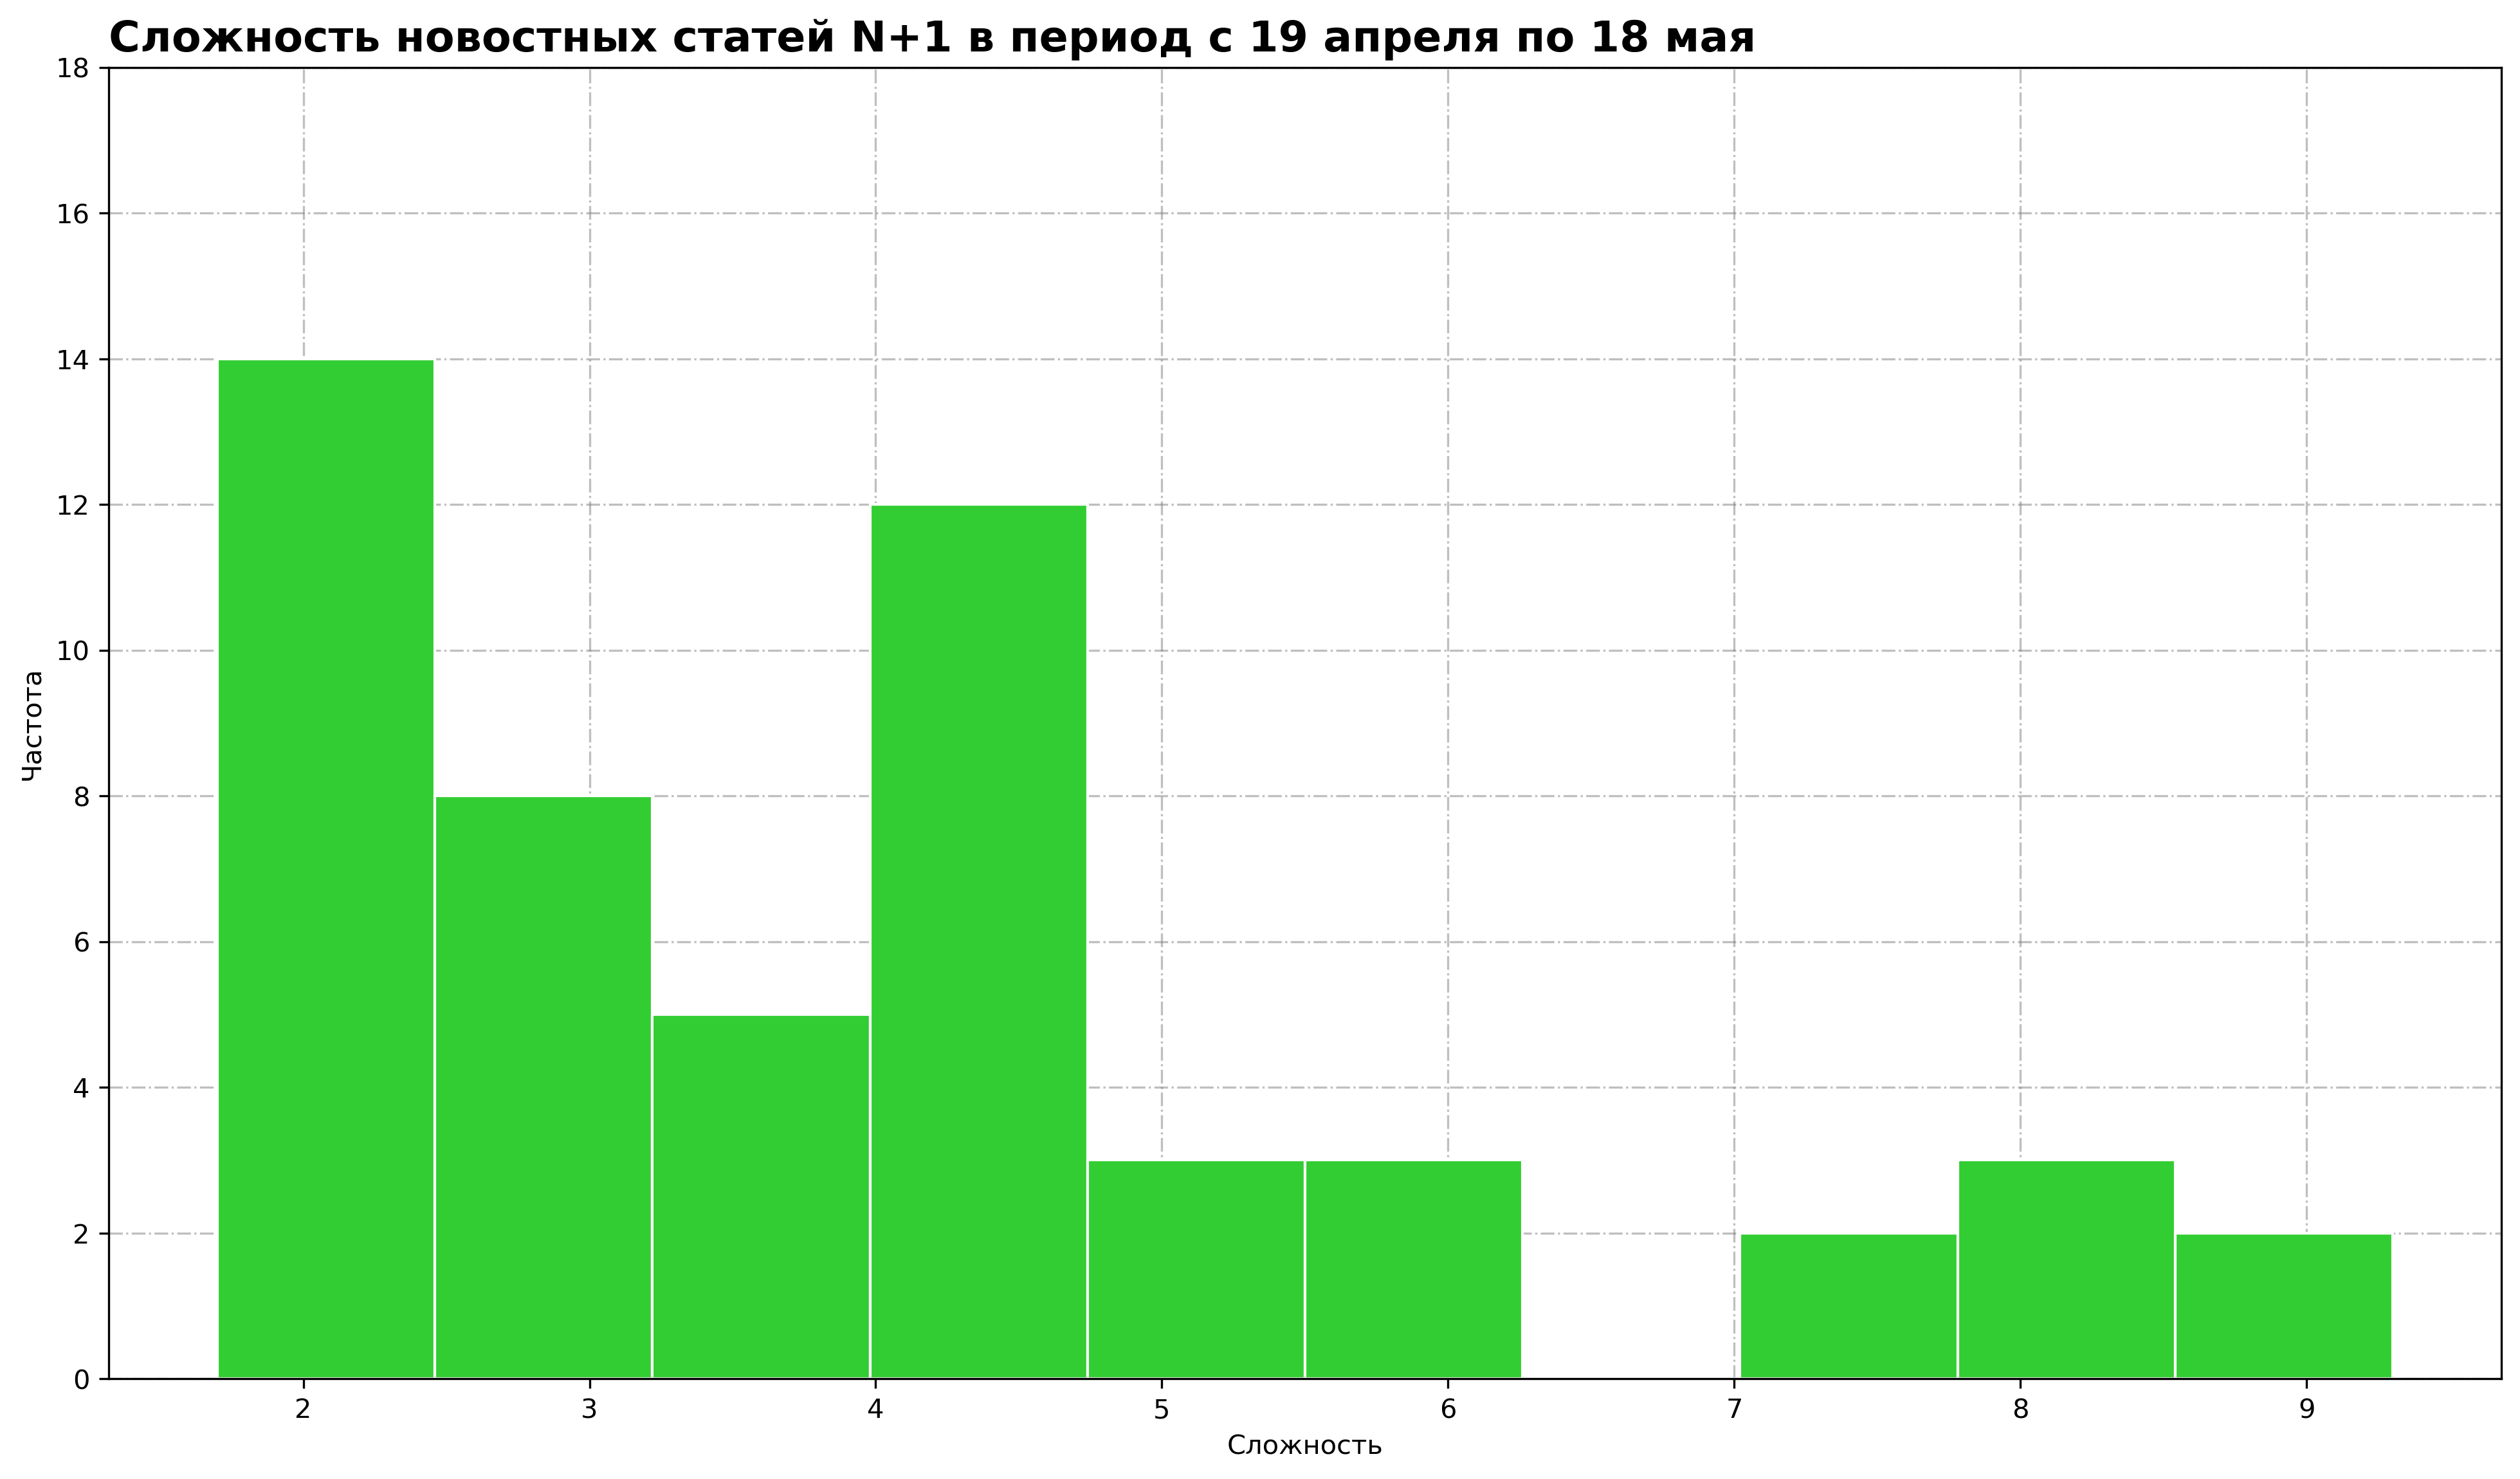

In [28]:
# размер графика 16 на 9 дюймов, разрешение 300 точек на дюйм

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# добавляем сетку grid с прозрачностью 50% (alpha)
# помещаем ее под сам график

ax.grid(linestyle = "-.", color = "grey", alpha = 0.5)
ax.set_axisbelow(True)

# строим гистограмму
# по оси y корректируем засечки, чтобы не было странных дробных чисел,
# добавляем подписи, оформление текста – через словарь fontdict,
# выравнивание заголовка по левому краю через аргумент loc

ax.hist(df["diffc"], color = "limegreen", edgecolor = "white");
ax.set_yticks(range(0, 20, 2));
ax.set_xlabel("Сложность");
ax.set_ylabel("Частота");
ax.set_title("Сложность новостных статей N+1 в период с 19 апреля по 18 мая", 
             loc = "left",
             fontdict = {"weight" : "bold", "size" : 16});

### Задача 8*

Постройте столбиковую диаграмму, отражающую, новости в каких рубриках публикуются чаще, а в каких – реже.

In [29]:
# смотрим на таблицу частот для рубрик
# значения в rubrics составные, рубрик иногда несколько

df["rubrics"].value_counts()

Астрономия                     8
Медицина                       7
Физика                         7
Зоология                       5
Антропология, Археология       3
Археология                     3
Экология и климат              3
Химия                          2
Зоология, Ботаника             1
Зоология, Биология             1
Материалы, Физика              1
Астрономия, Геология           1
Физика, Материалы              1
Экология и климат, Зоология    1
IT                             1
Гаджеты, IT                    1
Медицина, Психология           1
Антропология                   1
Космонавтика                   1
Ботаника, Экология и климат    1
Роботы и дроны                 1
IT, Медицина, Химия            1
Name: rubrics, dtype: int64

In [30]:
# получаем список уникальных отдельных рубрик
# забираем массив с названиями рубрик через .values
# склеиваем через , с пробелом
# разбиваем по ним же (внутри рубрик записи с , уже были, 
# мы не выполняем две обратные операции, результат новый)
# превращаем множество – убираем дубликаты, сортируем

rubr = sorted(set(", ".join(df["rubrics"].values).split(", ")))
print(rubr)

['IT', 'Антропология', 'Археология', 'Астрономия', 'Биология', 'Ботаника', 'Гаджеты', 'Геология', 'Зоология', 'Космонавтика', 'Материалы', 'Медицина', 'Психология', 'Роботы и дроны', 'Физика', 'Химия', 'Экология и климат']


In [31]:
# считаем частоты – пример одной рубрики

df["rubrics"].str.contains("Биология").sum()

1

In [33]:
# считаем частоты для всех рубрик
# если частота < 2,относим к категории Другое

data = {"Другое" : 0}

for r in rubr:
    s = df["rubrics"].str.contains(r).sum()
    if s < 2:
        data["Другое"] += 1
    else:
        data[r] = s
print(data)

{'Другое': 6, 'IT': 3, 'Антропология': 4, 'Археология': 6, 'Астрономия': 9, 'Ботаника': 2, 'Зоология': 8, 'Материалы': 2, 'Медицина': 9, 'Физика': 9, 'Химия': 3, 'Экология и климат': 5}


In [34]:
# необязательный этап, сортировать можно по-разному
# преобразуем словарь в Series и сортируем от частых к редким

tab = pd.Series(data)
tab = tab.sort_values(ascending = False)
print(tab)

Астрономия           9
Медицина             9
Физика               9
Зоология             8
Другое               6
Археология           6
Экология и климат    5
Антропология         4
IT                   3
Химия                3
Ботаника             2
Материалы            2
dtype: int64


In [35]:
# забираем названия категорий и превращаем в список (не Index)
# забираем соответствующие частоты (можно без list, массив array сгодится)

x = list(tab.index)
y = list(tab.values)

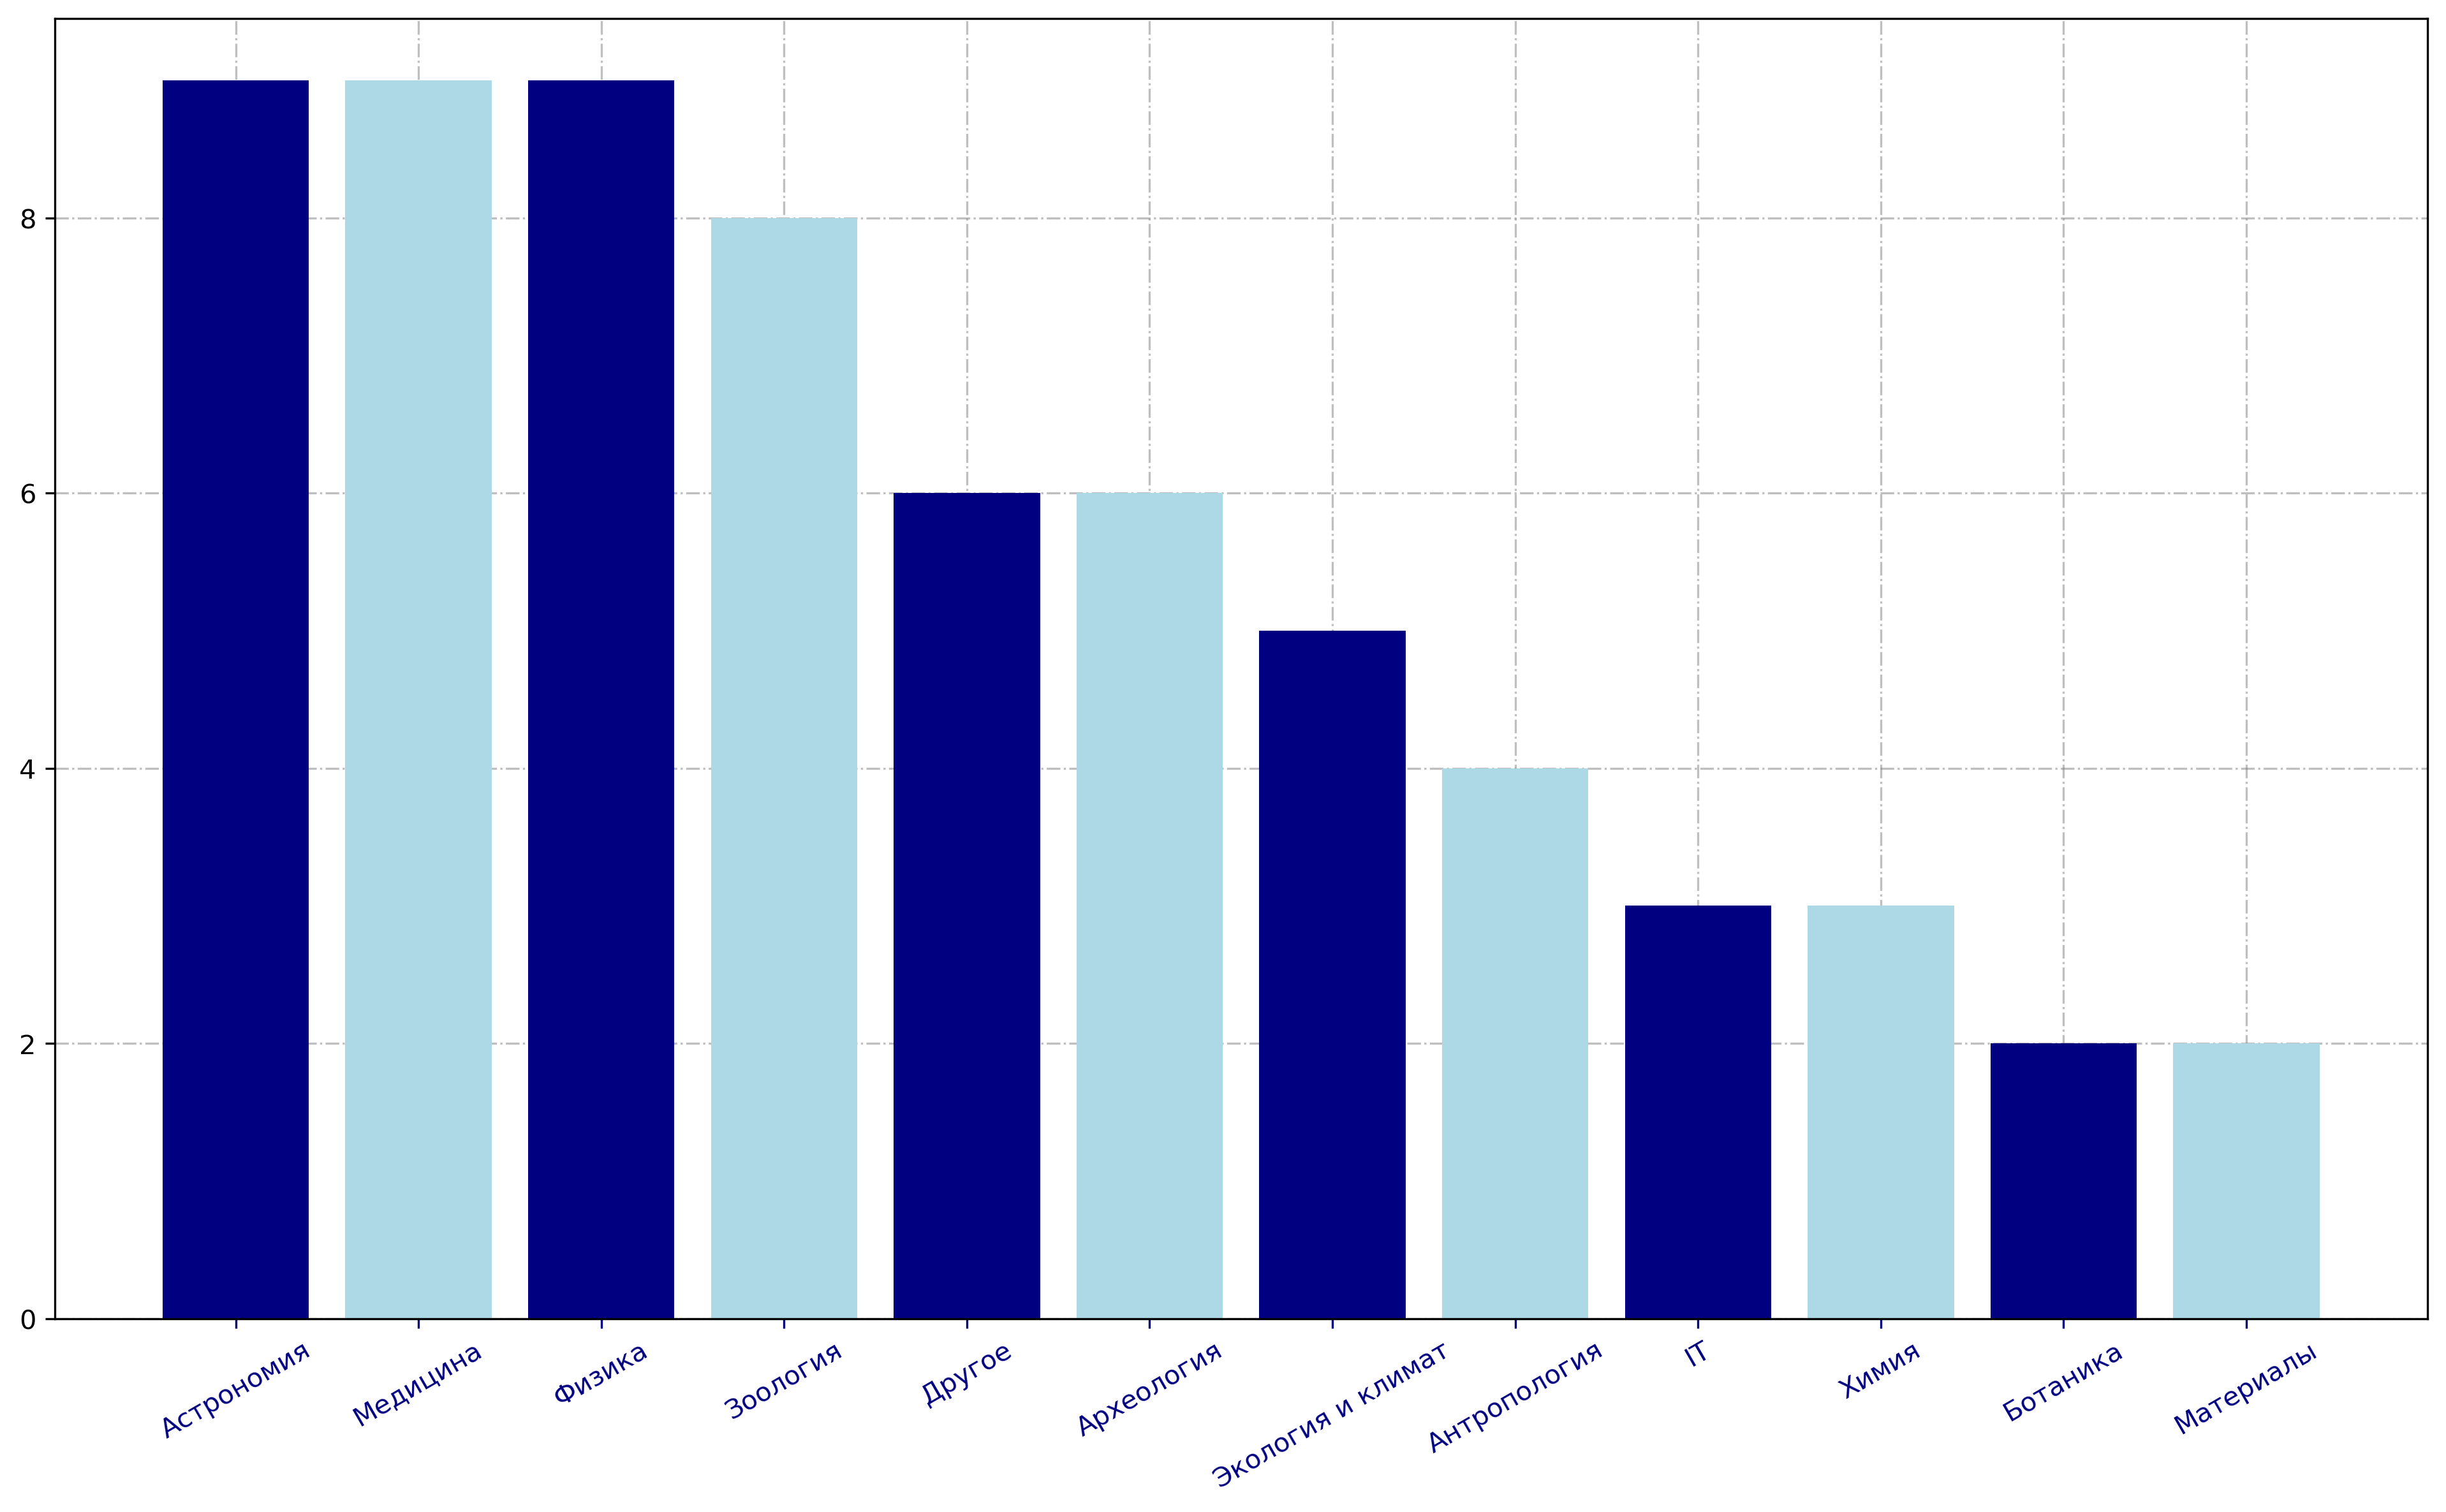

In [36]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.grid(linestyle = "-.", color = "grey", alpha = 0.5)
ax.set_axisbelow(True)

# строим столбиковую диаграмму,
# два чередующихся цвета,
# поворачиваем подписи по x с углом 30 градусов

ax.bar(x, y, color = ["navy", "lightblue"]);
ax.tick_params(axis = 'x', rotation = 30, colors = "navy")

# сохраняем график
fig.savefig("bar.png")

In [37]:
# если хотим сами подобрать цвета для каждого столбца, 
# нужно перечислить их все в списке
# список можно создать из повторяющихся значений

cols = ["navy"] * 4 + ["blue"] * 5 + ["lightblue"] * 4
print(cols)

['navy', 'navy', 'navy', 'navy', 'blue', 'blue', 'blue', 'blue', 'blue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
